In [1]:
from PIL import Image
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
 # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서   
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
라벨:  0


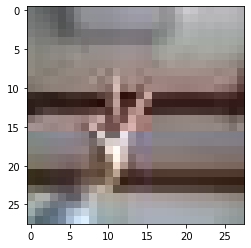

In [3]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm= x_train / 255.0# 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

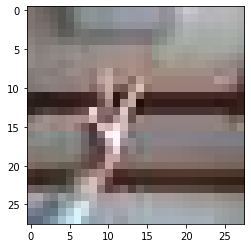

51 번째 이미지는 바로  0 입니다.


In [4]:
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()  # model은 keras안에 models이라는 메서드안에 Sequential 이라는 함수에 넣는것.
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

index=50     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')


In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 16.0957 - accuracy: 0.3267
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 2.4394 - accuracy: 0.6600
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.8500
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9333
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9367
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9667
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9900
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9900
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9933


In [6]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
 # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서   
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"

resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)

198  images to be resized.
198  images resized.
205  images to be resized.
205  images resized.
221  images to be resized.
221  images resized.


훈련데이터(x_test)의 이미지 개수는 403 입니다.
x_test shape: (624, 28, 28, 3)
y_test shape: (624,)
타켓:  0


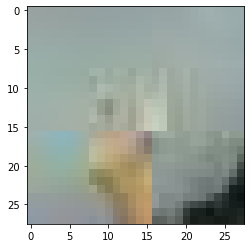

In [10]:
def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=624 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    
    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper.test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("훈련데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test / 255.0 # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('타켓: ', y_test[0])

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

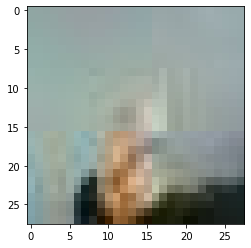

51 번째 이미지는 바로  0 입니다.


In [11]:
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()  # model은 keras안에 models이라는 메서드안에 Sequential 이라는 함수에 넣는것.
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

index=50     
plt.imshow(x_test[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_test[index], '입니다.')


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test, y_test, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 10.8997 - accuracy: 0.5929
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 1.9872 - accuracy: 0.7035
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 1.6407 - accuracy: 0.7676
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.8349
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8814
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.8301
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8862
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9199
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.9343
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9279


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


20/20 - 0s - loss: 0.1045 - accuracy: 0.9551
test_loss: 0.10450775176286697 
test_accuracy: 0.9551281929016113
